In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
daily_act = pd.read_csv("archive/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep = pd.read_csv("archive/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
my_act = pd.read_csv("archive/my_activity.csv")
my_sleep=pd.read_csv("archive/my_sleep.csv")

In [231]:
daily_act

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [232]:
daily_act['DayName']=  pd.to_datetime(daily_act['ActivityDate'])
daily_act["DayofWeek"] = daily_act["DayName"].dt.day_name()
my_act["DayName"] =  pd.to_datetime(my_act['dateTime'])
my_act["DayofWeek"] = my_act["DayName"].dt.day_name()
daily_act = daily_act.drop(["ActivityDate"], axis=1)
my_act = my_act.drop(["dateTime"], axis=1)

In [233]:
my_act

,Calories,TotalSteps,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,DayName,DayofWeek
0,2433,3283,1334,75,11,20,2021-07-05,Monday
1,2525,3626,774,106,3,4,2021-07-06,Tuesday
2,2986,3964,993,80,12,55,2021-07-07,Wednesday
3,2962,7231,917,170,11,18,2021-07-08,Thursday
4,2274,1251,899,75,0,0,2021-07-09,Friday
5,2493,1442,932,86,0,0,2021-07-10,Saturday
6,3149,6973,728,91,26,44,2021-07-11,Sunday
7,2314,1003,1048,66,0,0,2021-07-12,Monday
8,2827,6395,973,53,15,47,2021-07-13,Tuesday
9,2402,1081,1159,89,0,0,2021-07-14,Wednesday


<AxesSubplot:xlabel='Calories', ylabel='DayofWeek'>

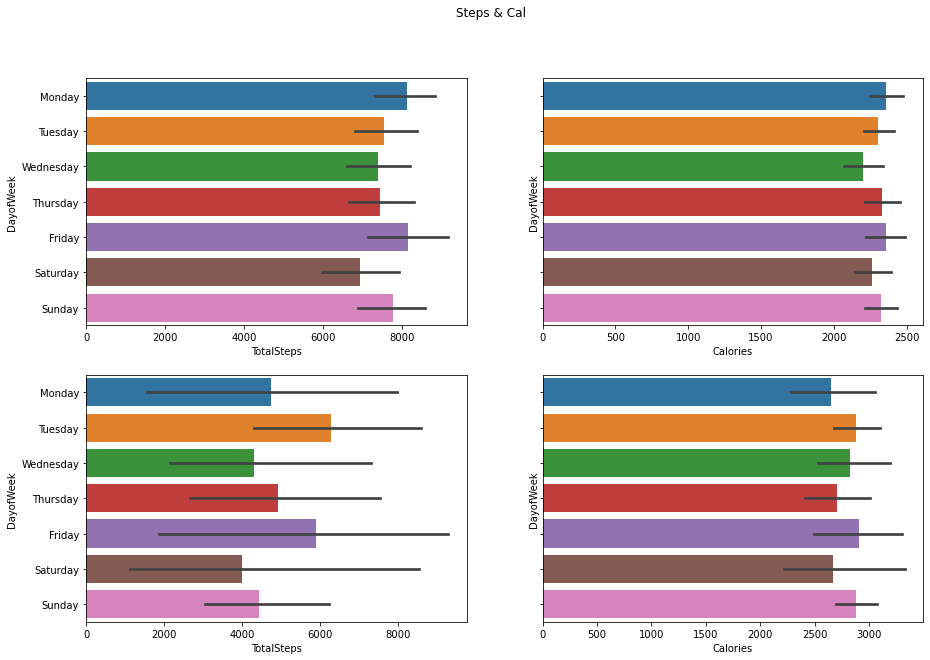

In [234]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Steps & Cal')
sns.barplot(ax=axes[0,0], x=daily_act["TotalSteps"], y = daily_act["DayofWeek"])
sns.barplot(ax=axes[0,1],x = daily_act["Calories"], y = daily_act["DayofWeek"])
sns.barplot(ax=axes[1,0], x=my_act["TotalSteps"], y = my_act["DayofWeek"])
sns.barplot(ax=axes[1,1],x = my_act["Calories"], y = my_act["DayofWeek"])

C:\Users\hjhhi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


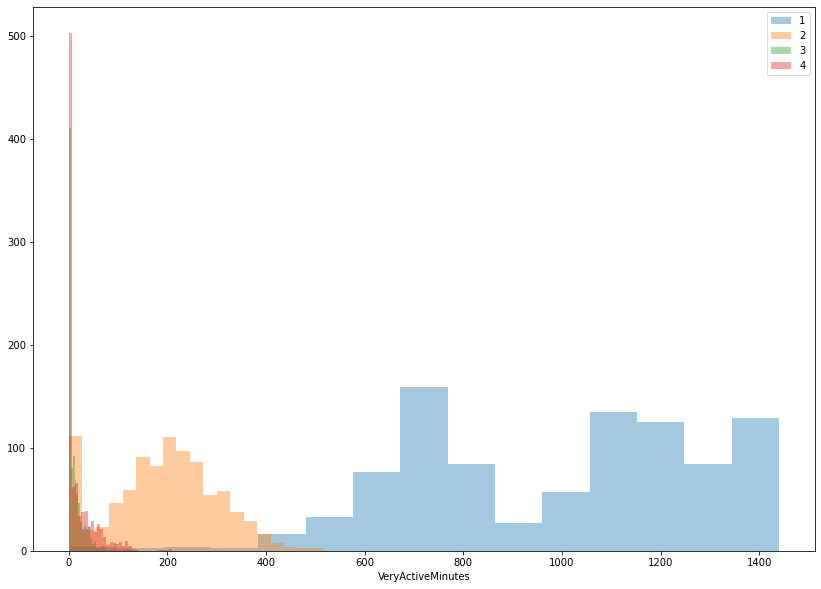

In [235]:
plt.figure(figsize=(14,10))
sns.distplot(a=daily_act["SedentaryMinutes"],label="1", kde=False)
sns.distplot(a=daily_act["LightlyActiveMinutes"],label="2", kde=False)
sns.distplot(a=daily_act["FairlyActiveMinutes"],label="3", kde=False)
sns.distplot(a=daily_act["VeryActiveMinutes"],label="4", kde=False)
plt.legend()

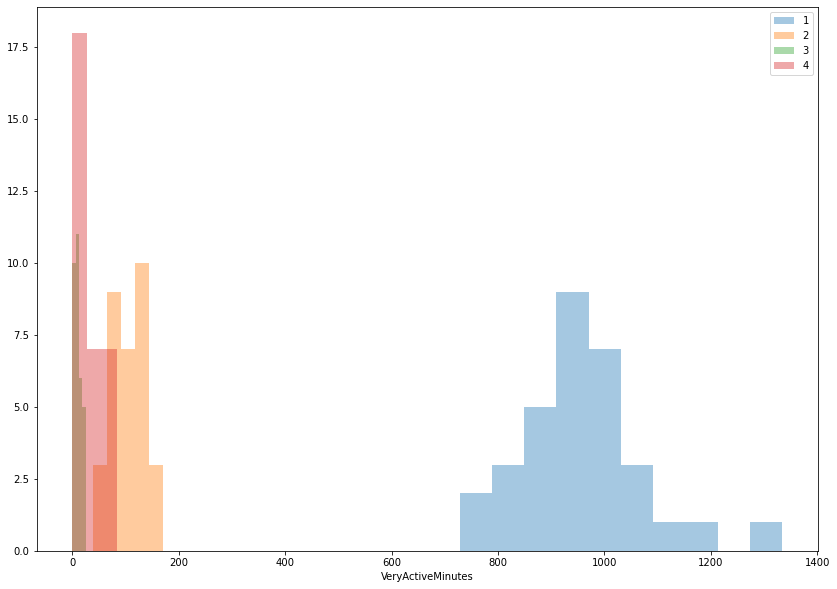

In [236]:
plt.figure(figsize=(14,10))
sns.distplot(a=my_act["SedentaryMinutes"],label="1", kde=False)
sns.distplot(a=my_act["LightlyActiveMinutes"],label="2", kde=False)
sns.distplot(a=my_act["FairlyActiveMinutes"],label="3", kde=False)
sns.distplot(a=my_act["VeryActiveMinutes"],label="4", kde=False)
plt.legend()

In [237]:
print(daily_act["SedentaryMinutes"].mean())
print(daily_act["LightlyActiveMinutes"].mean())
print(daily_act["FairlyActiveMinutes"].mean())
print(daily_act["VeryActiveMinutes"].mean())

991.2106382978724
192.8127659574468
13.564893617021276
21.164893617021278


In [247]:
act_mean=[]
act_mean.append(daily_act["SedentaryMinutes"].mean())
act_mean.append(daily_act["LightlyActiveMinutes"].mean())
act_mean.append(daily_act["FairlyActiveMinutes"].mean())
act_mean.append(daily_act["VeryActiveMinutes"].mean())
my_act_mean=[]
my_act_mean.append(my_act["SedentaryMinutes"].mean())
my_act_mean.append(my_act["LightlyActiveMinutes"].mean())
my_act_mean.append(my_act["FairlyActiveMinutes"].mean())
my_act_mean.append(my_act["VeryActiveMinutes"].mean())

([<matplotlib.patches.Wedge at 0x146490df0a0>,
 [Text(-0.916147359424309, 0.6088300385328126, 'SedentaryMinutes'),
  Text(0.8580466690343953, -0.688299290831379, 'LightlyActiveMinutes'),
  Text(1.088602111704784, -0.1579412624740135, 'FairlyActiveMinutes'),
  Text(1.098363311908503, -0.0599836232098808, 'VeryActiveMinutes')],
 [Text(-0.49971674150416845, 0.33208911192698864, '81.3%'),
  Text(0.4680254558369428, -0.37543597681711577, '15.8%'),
  Text(0.5937829700207912, -0.08614977953128007, '1.1%'),
  Text(0.5991072610410015, -0.03271833993266225, '1.7%')])

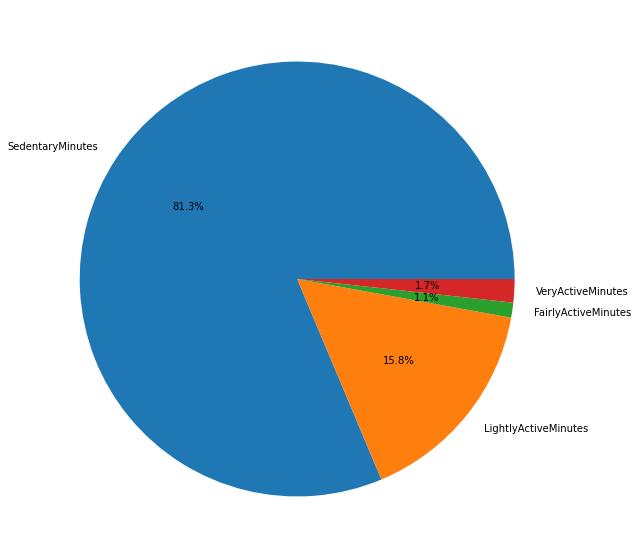

In [249]:
plt.figure(figsize=(14,10))
plt.pie(act_mean, labels=["SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"],autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x146491248e0>,
 [Text(-1.0052569285026247, 0.4466077783665093, 'SedentaryMinutes'),
  Text(0.9480072107817092, -0.5579268126787635, 'LightlyActiveMinutes'),
  Text(1.0785751919203734, -0.21604526232697116, 'FairlyActiveMinutes'),
  Text(1.0961371147875898, -0.09210551332650045, 'VeryActiveMinutes')],
 [Text(-0.5483219610014316, 0.24360424274536868, '86.7%'),
  Text(0.5170948422445686, -0.3043237160065983, '9.7%'),
  Text(0.5883137410474764, -0.11784287036016608, '1.0%'),
  Text(0.5978929717023217, -0.05023937090536388, '2.7%')])

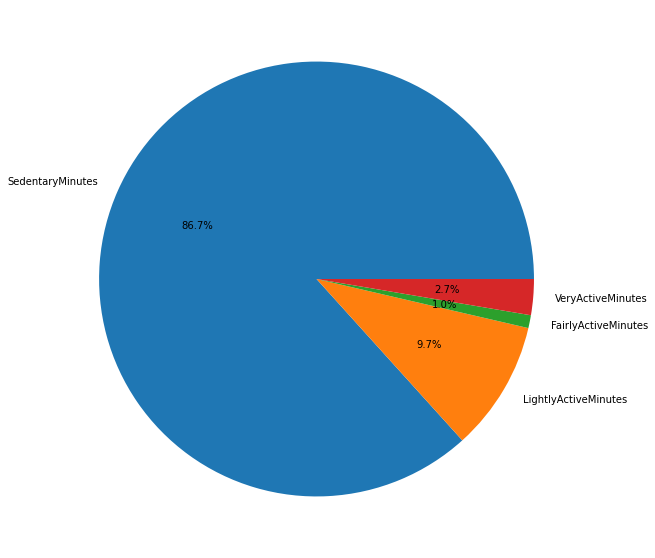

In [250]:
plt.figure(figsize=(14,10))
plt.pie(my_act_mean, labels=["SedentaryMinutes","LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes"],autopct='%1.1f%%')

In [254]:
my_sleep

,SleepDay,TotalMinutesAsleep,TotalTimeInBed,Day Name,DayofWeek,NotinBed
0,2021-08-05,429,524,2021-08-05,Thursday,95
1,2021-08-04,269,312,2021-08-04,Wednesday,43
2,2021-08-03,240,277,2021-08-03,Tuesday,37
3,2021-08-02,323,387,2021-08-02,Monday,64
4,2021-08-01,275,324,2021-08-01,Sunday,49
5,2021-07-31,350,358,2021-07-31,Saturday,8
6,2021-07-30,286,350,2021-07-30,Friday,64
7,2021-07-29,231,281,2021-07-29,Thursday,50
8,2021-07-28,246,295,2021-07-28,Wednesday,49
9,2021-07-27,372,410,2021-07-27,Tuesday,38


In [252]:
sleep_day['SleepDay']=  pd.to_datetime(sleep_day['SleepDay'])
sleep_day["DayofWeek"] = sleep_day["SleepDay"].dt.day_name()
sleep_day["NotinBed"] = sleep_day["TotalTimeInBed"] - sleep_day["TotalMinutesAsleep"]
my_sleep['SleepDay']=  pd.to_datetime(my_sleep['SleepDay'])
my_sleep["DayofWeek"] = my_sleep["SleepDay"].dt.day_name()
my_sleep["NotinBed"] = my_sleep["TotalTimeInBed"] - my_sleep["TotalMinutesAsleep"]

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='DayofWeek'>

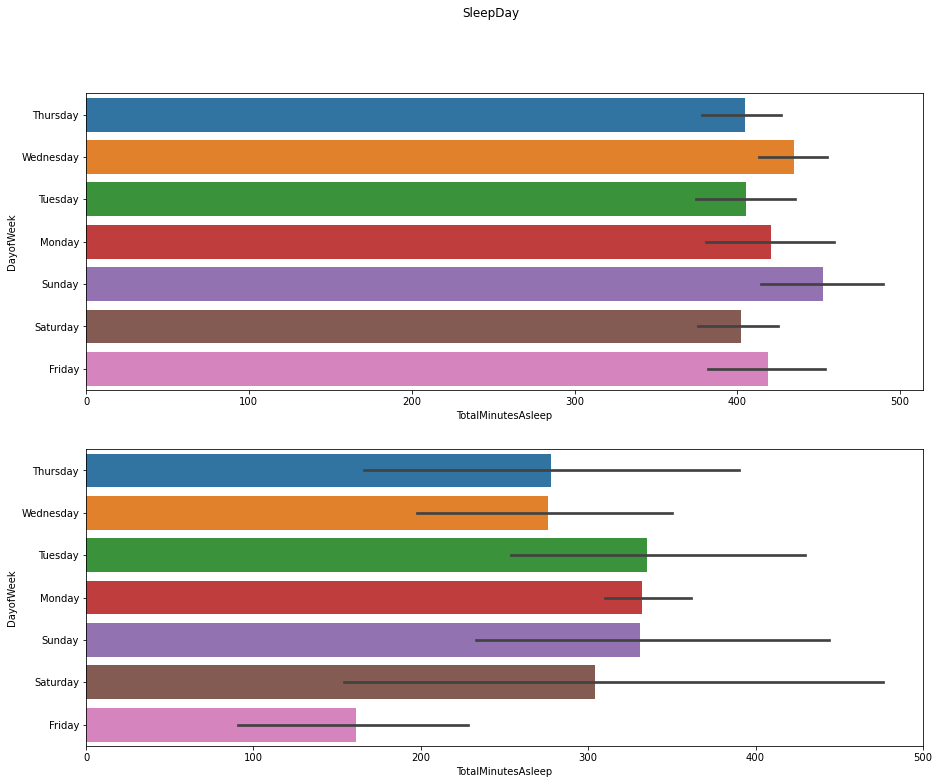

In [262]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharey=True)
fig.suptitle('SleepDay')
sns.barplot(ax=axes[0],x=sleep_day["TotalMinutesAsleep"], y=sleep_day["DayofWeek"],)
sns.barplot(ax=axes[1],x=my_sleep["TotalMinutesAsleep"], y=my_sleep["DayofWeek"])

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='Density'>

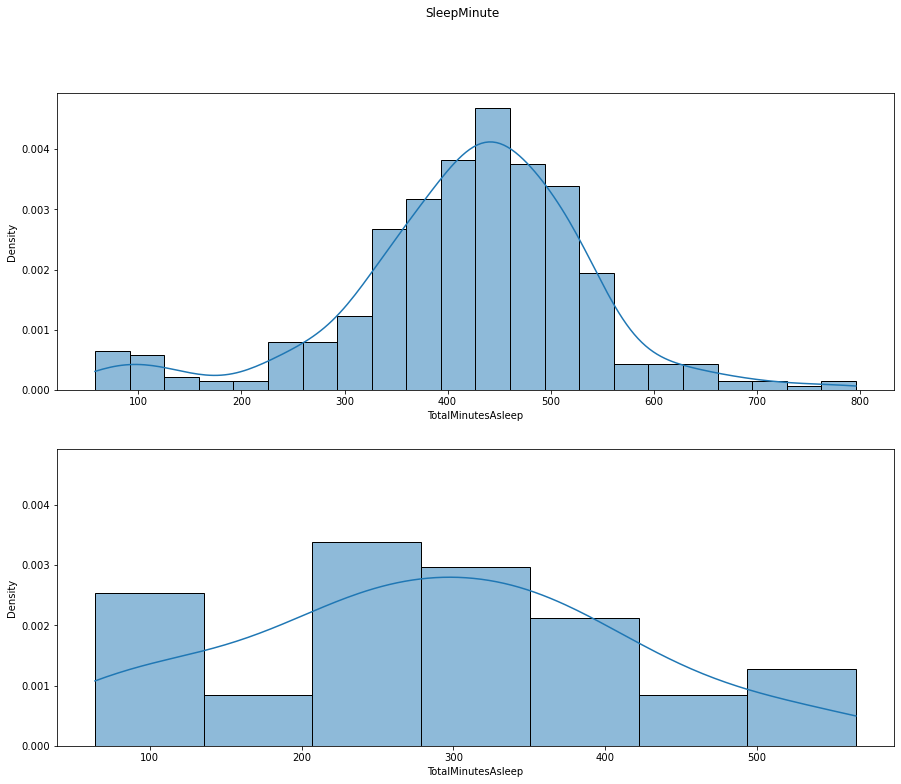

In [283]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharey=True)
fig.suptitle('SleepMinute')
sns.histplot(ax=axes[0],x=sleep_day["TotalMinutesAsleep"], kde=True,stat="density")
sns.histplot(ax=axes[1],x=my_sleep["TotalMinutesAsleep"], kde=True,stat="density")

In [244]:
my_sleep['Day Name']=  pd.to_datetime(my_sleep['SleepDay'])
# daily_act["DayofWeek"] = daily_act["Day Name"].dt.day_name()

In [245]:
my_sleep

,SleepDay,TotalMinutesAsleep,TotalTimeInBed,Day Name
0,2021. 8. 5.,429,524,2021-08-05
1,2021. 8. 4.,269,312,2021-08-04
2,2021. 8. 3.,240,277,2021-08-03
3,2021. 8. 2.,323,387,2021-08-02
4,2021. 8. 1.,275,324,2021-08-01
5,2021. 7. 31.,350,358,2021-07-31
6,2021. 7. 30.,286,350,2021-07-30
7,2021. 7. 29.,231,281,2021-07-29
8,2021. 7. 28.,246,295,2021-07-28
9,2021. 7. 27.,372,410,2021-07-27


<AxesSubplot:xlabel='NotinBed', ylabel='TotalSteps'>

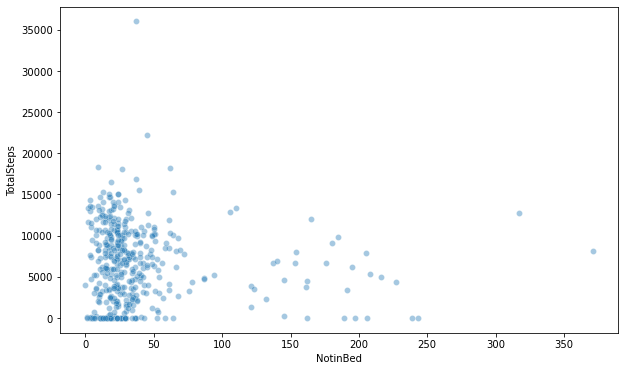

In [246]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=sleep_day["NotinBed"], y=daily_act["TotalSteps"], alpha=0.4)

<AxesSubplot:xlabel='NotinBed', ylabel='TotalSteps'>

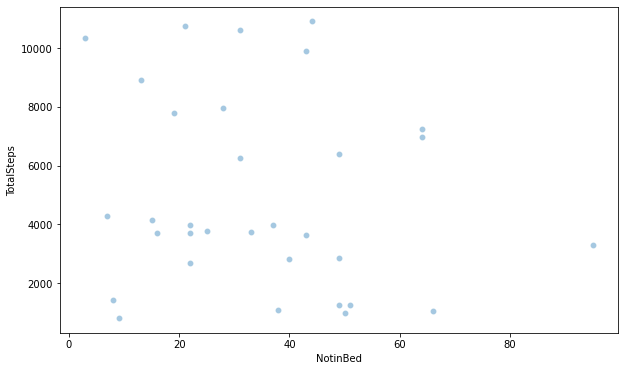

In [287]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=my_sleep["NotinBed"], y=my_act["TotalSteps"], alpha=0.4)
#Not in bed관련해서 추가적으로 그래프를 그려서 정보를 확인해보자